In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np

import statistics

In [2]:
n_gen = 200
n = 10

In [3]:
with open("Results_dict_ga.json", "r") as f:
    ga = json.load(f)

In [4]:
with open("Results_dict_mo.json", "r") as f:
    mo = json.load(f)

In [5]:
with open("Results_dict_random.json", "r") as f:
    ran = json.load(f)

*Group by 10 generations*

In [9]:
mo_by_generation = {}
for i in range(0, n_gen, n):
    mo_by_generation[i] = []
#mo_by_generation

In [10]:
ga_by_generation = {}
for i in range(0, n_gen, n):
    ga_by_generation[i] = []

In [11]:
ran_by_generation = {}
for i in range(0, n_gen, n):
    ran_by_generation[i] = []

In [12]:
n_gen_res = []
for i, run in enumerate(ran):
    for m in range(0, len(ran[run]["fitness"]), n):
        ran_by_generation[m].append(ran[run]["fitness"][m])

In [13]:

for i, run in enumerate(mo):
    for m in range(0, len(mo[run]["fitness"]), n):
        mo_by_generation[m].append(mo[run]["fitness"][m])
        

In [14]:
for i, run in enumerate(ga):
    for m in range(0, len(ga[run]["fitness"]), n):
        ga_by_generation[m].append(ga[run]["fitness"][m])


Calculate the novelty

In [20]:
mo_novelty = []
for i, run in enumerate(mo):
    mo_novelty.append(-mo[run]["novelty"])

In [21]:
ga_novelty = []
for i, run in enumerate(ga):
    ga_novelty.append(-ga[run]["novelty"])

Calculate time

In [15]:
mo_time = []
for i, run in enumerate(mo):
    mo_time.append(mo[run]["time"])
sum(mo_time)/len(mo_time)

123.66509956518809

In [16]:
ga_time = []
for i, run in enumerate(ga):
    ga_time.append(ga[run]["time"])
sum(ga_time)/len(ga_time)

136.6919586022695

Build graphs

In [24]:
def build_boxplot(y1, x1):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.set_xlabel('Type of algorithm', fontsize=16)
    ax1.set_ylabel('Average novelty', fontsize=16)
    
    ax1.set_xticklabels(x1, fontsize=16, rotation=45)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.5)

    top = 15
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)    
    ax1.tick_params(axis='y', labelsize=16)

<ipython-input-24-ba0d97d0a277>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=45)


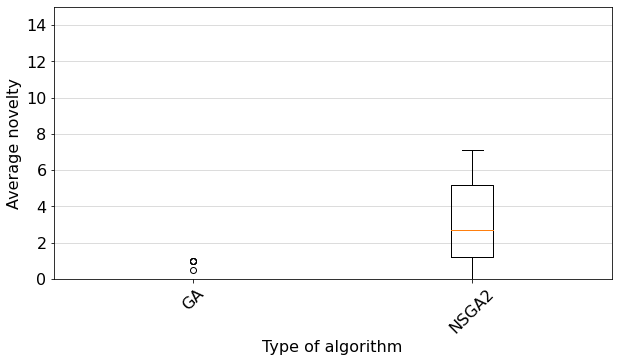

In [25]:
build_boxplot([ga_novelty, mo_novelty], ["GA", "NSGA2"] )

In [29]:
def build_boxplot_time(y1, x1):
    fig, ax1 = plt.subplots(figsize=(20, 10))
    
    ax1.set_xlabel('Type of algorithm', fontsize=16)
    ax1.set_ylabel('Time for 50 000 evaluations, sec', fontsize=16)
    
    ax1.set_xticklabels(x1, fontsize=16, rotation=45)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.5)
    top = 200
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)
    
    ax1.tick_params(axis='y', labelsize=16)

<ipython-input-29-fce701a93406>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=45)


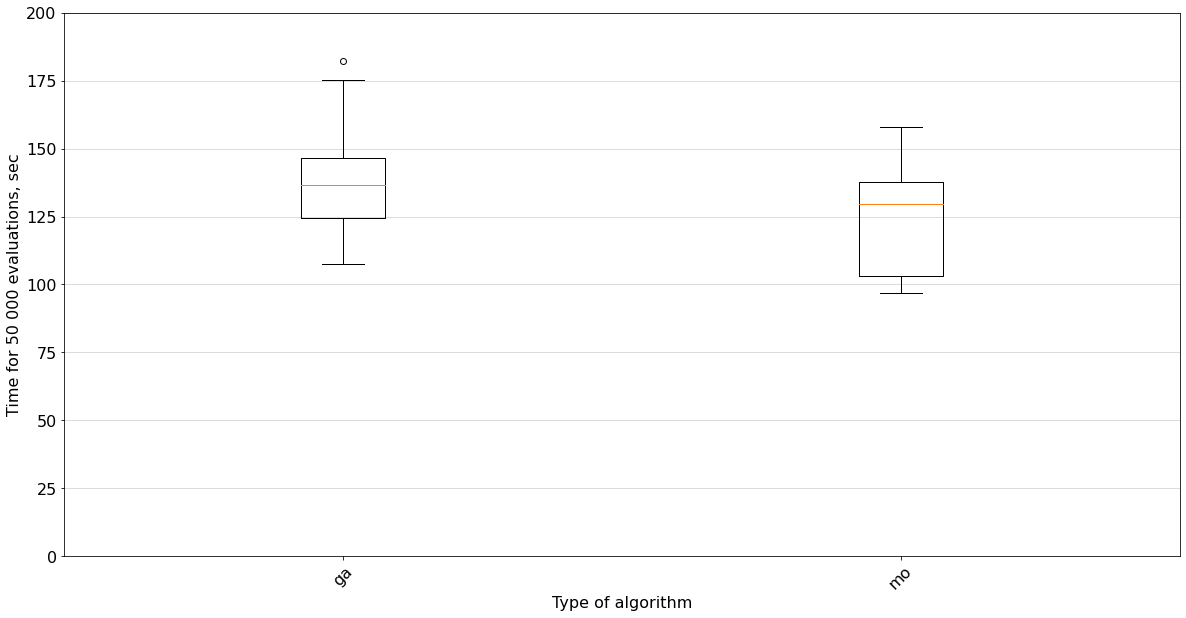

In [30]:
build_boxplot_time([ga_time, mo_time], ["ga", "mo"] )

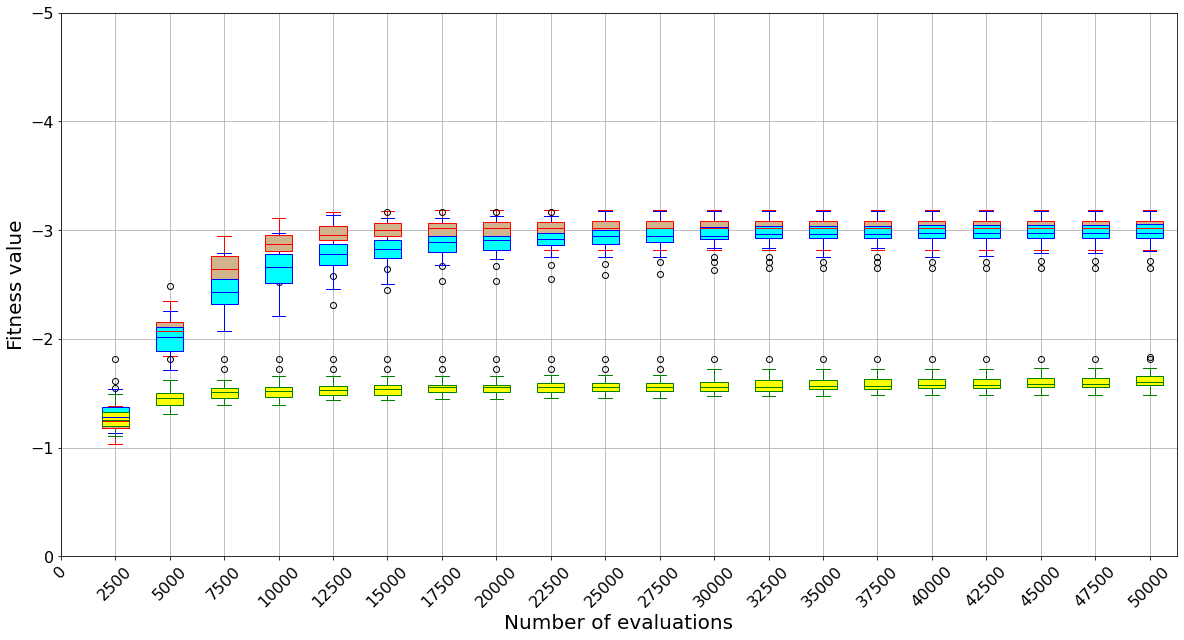

In [37]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  
        
        
x = range(0, 21, 1)
        
x1 = range(0, 50100, 2500)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Number of evaluations', fontsize=20)
ax.set_ylabel('Fitness value', fontsize=20)


box_plot([ga_by_generation[v] for v in ga_by_generation], 'red', 'tan')
box_plot([mo_by_generation[v] for v in mo_by_generation], 'blue', 'cyan')
box_plot([ran_by_generation[v] for v in ran_by_generation], 'green', 'yellow')

ax.set_xticks(x)
ax.set_ylim(0, -5)
ax.set_xticklabels(x1, fontsize=16, rotation=45)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
#plt.show()

Do statistical tests

In [ ]:
from scipy.stats import mannwhitneyu

In [58]:
mannwhitneyu(ga_novelty,mo_novelty, alternative="two-sided")

MannwhitneyuResult(statistic=0.0, pvalue=3.002865221010998e-11)

In [60]:
from cliffsDelta import cliffsDelta
d, res = cliffsDelta(ga_novelty,mo_novelty )
(d, res)

(-1.0, 'large')